In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'C:\Users\prasa\OneDrive\Desktop\COURSE\USL\data\beers.csv')
df.head()

,Brand,Brewery,PercentAlcohol,Calories,Carbohydrates
0,Anchor Steam,Anchor,4.9,153,16.0
1,Anheuser Busch Natural Light,Anheuser Busch,4.2,95,3.2
2,Anheuser Busch Natural Ice,Anheuser Busch,5.9,157,8.9
3,Aspen Edge,Adolph Coors,4.1,94,2.6
4,Blatz Beer,Pabst,4.8,153,12.5


In [7]:
x = df[['PercentAlcohol','Calories','Carbohydrates']]

In [8]:
x

,PercentAlcohol,Calories,Carbohydrates
0,4.9,153,16.0
1,4.2,95,3.2
2,5.9,157,8.9
3,4.1,94,2.6
4,4.8,153,12.5
...,...,...,...
81,5.0,145,10.0
82,4.5,150,14.0
83,4.4,135,12.0
84,3.8,98,6.6


In [11]:
scaler = StandardScaler()
x_s = scaler.fit_transform(x)

In [12]:
kmeans = KMeans(n_clusters = 4).fit(x_s)#assuming k=4
kmeans

KMeans(n_clusters=4)

In [15]:
centroid = kmeans.cluster_centers_
label = kmeans.labels_
print('centroid:',centroid)
print('\n')
print('label:',label)

centroid: [[ 0.74724109  1.15773004  1.09501463]
 [ 0.15876809  0.13825555  0.09763143]
 [-0.77819357 -1.29848644 -1.30109334]
 [-5.828537   -2.57183645  0.53084307]]


label: [0 2 1 2 1 0 1 1 2 2 1 2 1 0 2 1 0 1 2 1 0 0 1 0 1 1 1 2 2 2 1 1 0 1 0 0 2
 2 1 1 0 1 1 2 0 2 2 1 1 2 1 2 2 1 2 1 3 2 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0
 1 2 1 1 1 0 1 1 1 1 2 1]


In [16]:
##How to find cluster size???
cluster_range = range(1,20)
cluster_erros=[]
for num in cluster_range:
    km = KMeans(n_clusters=num).fit(x_s)
    cluster_erros.append(km.inertia_)

C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
cluster_df=pd.DataFrame({'num_range':cluster_range,'cluster_errors':cluster_erros})
cluster_df

,num_range,cluster_errors
0,1,258.000000
1,2,121.377419
2,3,88.235176
3,4,59.077160
4,5,39.846169
5,6,32.535784
6,7,28.179077
7,8,23.249350
8,9,19.752096
9,10,16.693048


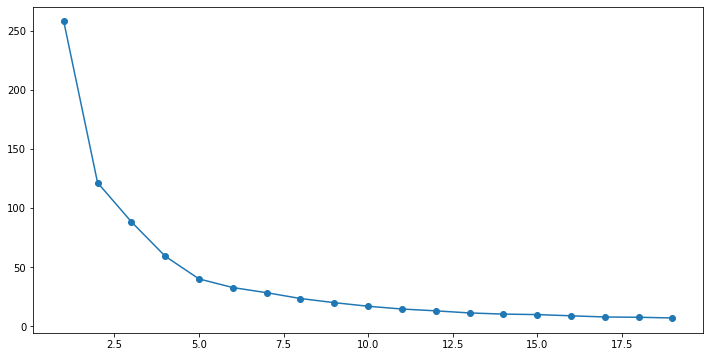

In [18]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_range,cluster_df.cluster_errors,marker='o')

Here the cluster size can be 4 or 5.

In [21]:
le = preprocessing.LabelEncoder()
df['Brewery'] = le.fit_transform(df['Brewery'])

In [23]:
df = df.drop('Brand',axis=1)

In [24]:
scaler = StandardScaler()
df_s = scaler.fit_transform(df)

In [25]:
kmeans = KMeans(n_clusters = 5).fit(df_s)#assuming k=4
kmeans

KMeans(n_clusters=5)

In [26]:
centroid = kmeans.cluster_centers_
label = kmeans.labels_
print('centroid:',centroid)
print('\n')
print('label:',label)

centroid: [[-0.94781095  0.36638887  0.4895229   0.55462041]
 [-0.41255561 -0.75417326 -1.31368454 -1.33171568]
 [ 0.95388474  1.45222284  1.22847171  0.3968253 ]
 [-1.024276   -5.828537   -2.57183645  0.53084307]
 [ 0.75664395 -0.10695203  0.1688784   0.33652476]]


label: [0 1 0 1 4 0 0 0 1 1 0 1 0 0 1 4 2 0 1 4 0 2 4 0 4 4 4 1 1 1 0 4 4 4 4 4 1
 1 2 4 0 0 0 1 0 1 1 2 4 1 4 1 1 4 1 2 3 4 4 2 4 4 2 2 4 0 0 0 0 4 4 2 2 2
 4 1 4 4 4 4 4 0 0 0 1 0]


In [38]:
l = pd.DataFrame(label,columns={'Labels'})

In [49]:
f = pd.concat([df,l],axis=1)

In [50]:
f

,Brewery,PercentAlcohol,Calories,Carbohydrates,Labels
0,1,4.9,153,16.0,0
1,2,4.2,95,3.2,1
2,2,5.9,157,8.9,0
3,0,4.1,94,2.6,1
4,10,4.8,153,12.5,4
...,...,...,...,...,...
81,4,5.0,145,10.0,0
82,4,4.5,150,14.0,0
83,4,4.4,135,12.0,0
84,4,3.8,98,6.6,1


In [51]:
y = f.Labels
X= f.drop('Labels',axis=1)

In [52]:
y.value_counts()

4    29
0    24
1    21
2    11
3     1
Name: Labels, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [58]:
clf.fit(X_train,y_train)
#predict the model
y_pred=clf.predict(X_test)

In [59]:
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9230769230769231


In [60]:
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.90      1.00      0.95         9

    accuracy                           0.92        26
   macro avg       0.76      0.77      0.76        26
weighted avg       0.89      0.92      0.90        26



C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
